### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [295]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Problems

Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.

Here we load the data and take a look at the column names.


In [296]:
data = pd.read_csv('data/coupons.csv')

In [297]:
# make sure to see all the columns
pd.set_option('display.max_columns', None)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [349]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon,bargoers,ages
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,Different,No,Less than or Equal to 3,Age 21 to 25
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3,Age 21 to 25
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No,Less than or Equal to 3,Age 21 to 25


In [350]:
# Take a look at the numerical data to see if any correlations jump out. None of the numerical really stands out as having a high correlation.
data.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.103633
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,1.000000


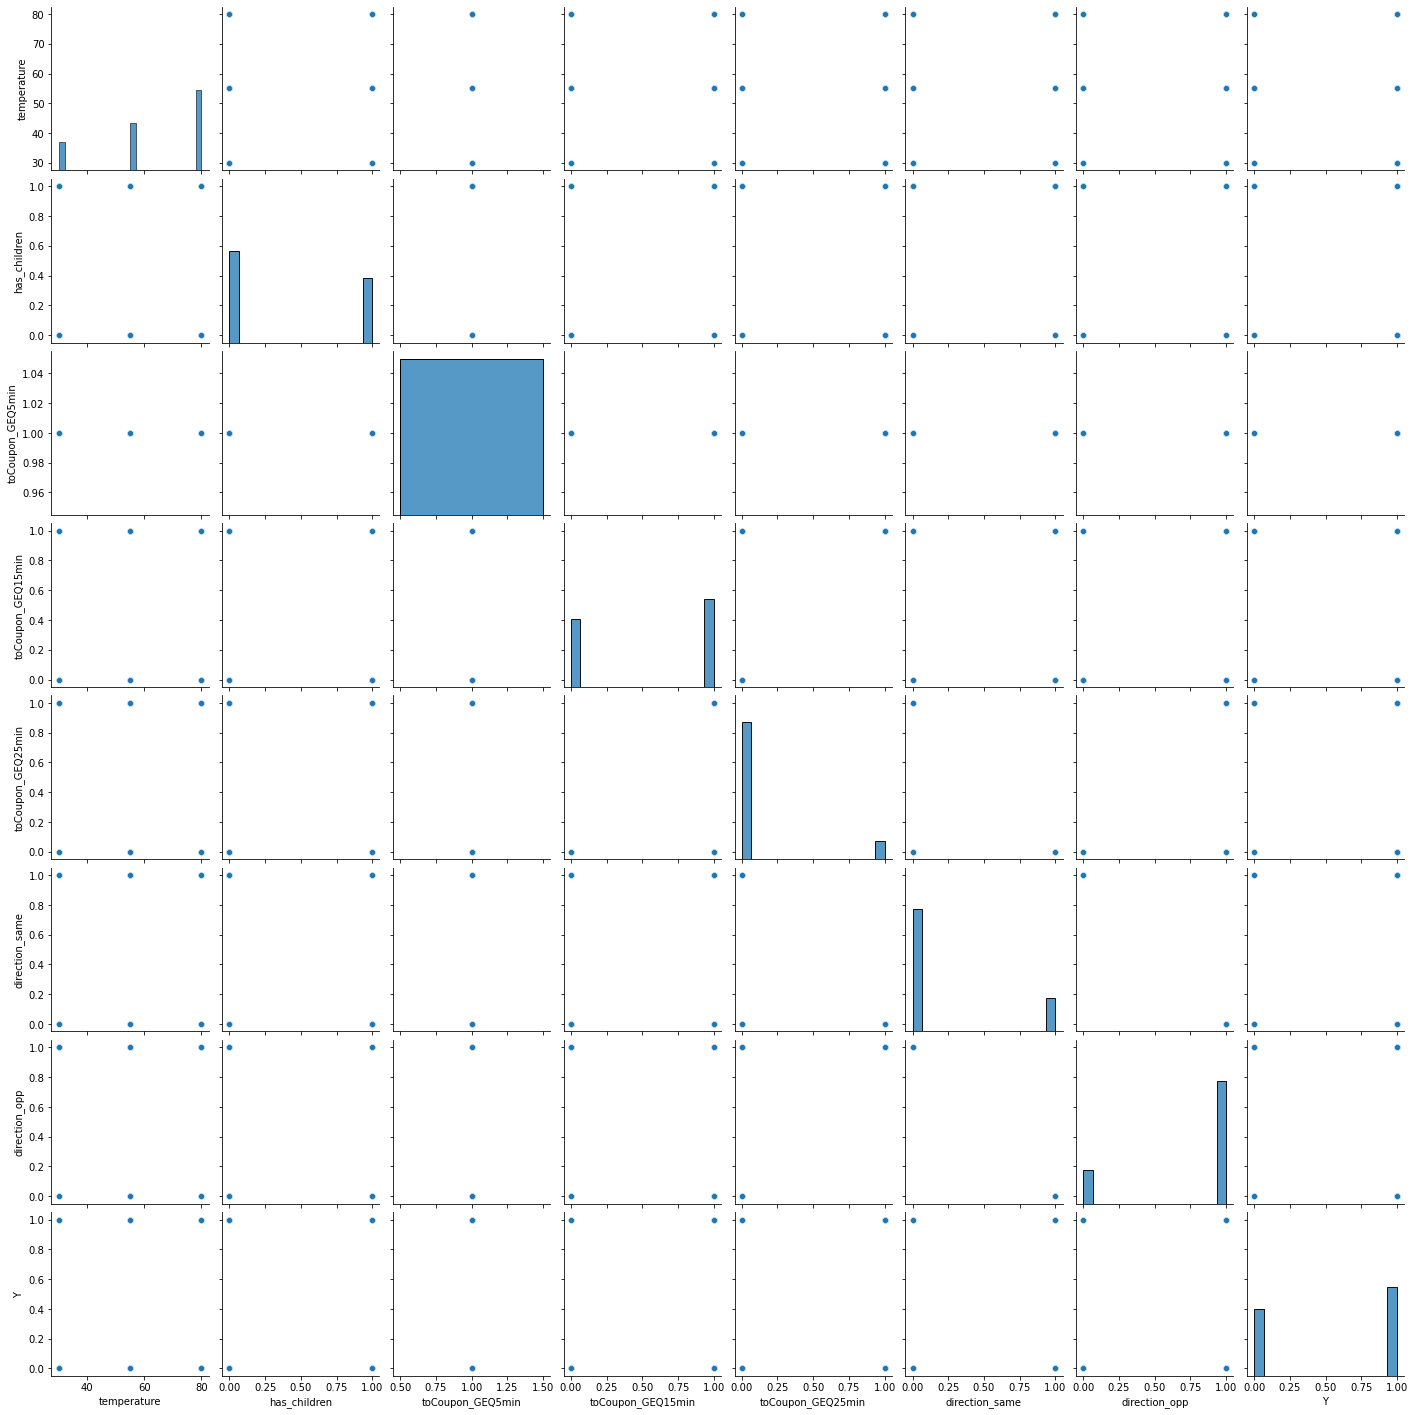

In [301]:
# very hard to see any meaningful relationships with pairplot
sns.pairplot(data = data)


## 2. Investigate the dataset for missing or problematic data.

In [302]:
# find null values for each column. Only significant one is car. Will drop car column and attempt to  fill in values for other columns
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [303]:
#investigate columns with missing data
data.car.unique()
data.Bar.unique()
data.CoffeeHouse.unique()
data.CarryAway.unique()
data.RestaurantLessThan20.unique()
data.Restaurant20To50.unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [304]:
#combine directions into 1 column
data['direction']= np.where(data['direction_same'] == 1, "Same", "Different")

In [305]:
# Create new column for if driver has accepted coupon
data['accepting_coupon']= np.where(data['Y'] == 1, "Yes", "No")

## 3. What to do with missing data
We will drop the car column and modify a few others.

In [306]:
#drop car column since so many values missing
data = data.drop(['car','direction_same','direction_opp'] , axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [307]:
#look at Bar data to see what to do with it. Large majority is less than 1 or never.  Will fill it with less1.
data['Bar'].value_counts(dropna = False)
data['Bar'].fillna('less1', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12467 non-null

In [308]:
# look at Coffeehouse Data to decide what to do with it. We have a more normal distribution here. Since it's still a relatively small number will fill with largest amount.
data['CoffeeHouse'].value_counts(dropna = False)
data['CoffeeHouse'].fillna('less1', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

## 4. What proportion of the total observations chose to accept the coupon? 
Let's start to examine the data


(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

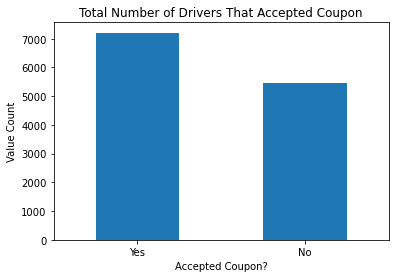

In [309]:
# Overall number of people that did and did not accept the coupon
data['accepting_coupon'].value_counts()
data['accepting_coupon'].value_counts().plot(kind = 'bar')
plt.xlabel('Accepted Coupon?')
plt.ylabel('Value Count')
plt.title('Total Number of Drivers That Accepted Coupon')
plt.xticks(rotation = 'horizontal')

In [351]:
data['accepting_coupon'].value_counts()

Yes    7210
No     5474
Name: accepting_coupon, dtype: int64

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

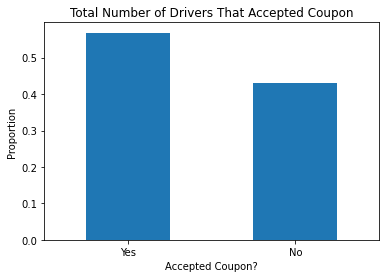

In [310]:
# Let's take a look at the proportion. 
data['accepting_coupon'].value_counts(normalize = True)
data['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('Accepted Coupon?')
plt.ylabel('Proportion')
plt.title('Total Number of Drivers That Accepted Coupon')
plt.xticks(rotation = 'horizontal')

In [352]:
# 57% of drivers accepted the coupon
data['accepting_coupon'].value_counts(normalize = True)

Yes    0.568433
No     0.431567
Name: accepting_coupon, dtype: float64

In [311]:
# Trying same thing with Plotly
fig = px.bar(data, x = 'accepting_coupon')
fig.show()

## 5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

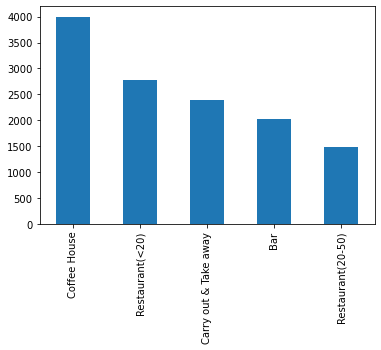

In [312]:
data['coupon'].value_counts()
data['coupon'].value_counts().plot(kind = 'bar')

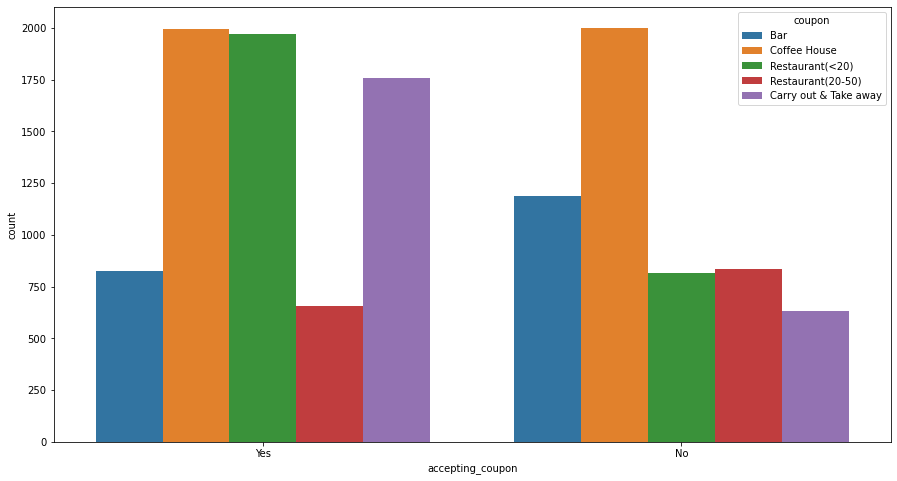

In [394]:
# Using bar chart to see the types of coupons accepted and not accepted.  We see that restaurant coupons at cheap
# restaurants  and carry out/take aways are the most likely to be accepted.  Bar coupons are the least likely to be accepted.
plt.figure(figsize = (15,8))
hue_order = ['Bar', 'Coffee House', 'Restaurant(<20)', "Restaurant(20-50)", 'Carry out & Take away']
x = sns.countplot(x = 'accepting_coupon', hue = 'coupon',  data = data, hue_order = hue_order)


## 6. Use a histogram to visualize the temperature column.

In [314]:
# From here we see that on hot days coupons are more likely to be accepted
data['temperature'].unique()
temp_fig = px.histogram(data, x = "temperature", color = "accepting_coupon")
temp_fig.show()

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [315]:
# new dataframe for just bar coupons
bar_coupons = data.query("coupon == 'Bar'")
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,Different,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,Same,Yes
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,Different,No
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,Different,Yes
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,Same,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,Different,No


## 2. What proportion of bar coupons were accepted?


<AxesSubplot:>

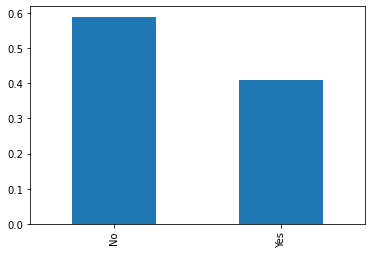

In [316]:
bar_coupons['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar')

In [317]:
#proportions accepting bar coupons.  We see that a majority, 59% of bar coupons were not accepted.
bar_coupons['accepting_coupon'].value_counts(normalize = True)

No     0.589985
Yes    0.410015
Name: accepting_coupon, dtype: float64

In [318]:
# bar coupons by age group
fig = px.histogram(bar_coupons, x="accepting_coupon", color="age")
fig.show()

In [319]:
# bar coupons by how often frequenting a bar. Clearly if you don't go to a bar often you're not accepting the coupon
fig = px.histogram(bar_coupons, x="accepting_coupon", color="Bar")
fig.show()

## 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [320]:
bar_coupons.shape
bar_coupons.shape[0]
bar_coupons.count()

destination             2017
passanger               2017
weather                 2017
temperature             2017
time                    2017
coupon                  2017
expiration              2017
gender                  2017
age                     2017
maritalStatus           2017
has_children            2017
education               2017
occupation              2017
income                  2017
Bar                     2017
CoffeeHouse             2017
CarryAway               1993
RestaurantLessThan20    1994
Restaurant20To50        1981
toCoupon_GEQ5min        2017
toCoupon_GEQ15min       2017
toCoupon_GEQ25min       2017
Y                       2017
direction               2017
accepting_coupon        2017
dtype: int64

In [321]:
# created a function to create new row for frequent(greater than 3) and infrequent(less than 4) bargoers
def calc_new_col(row):
    if row['Bar'] == 'never' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == 'less1' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == '1~3' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == '4~8' :
        return 'Greater than 3'
    elif row['Bar'] == 'gt8' :
        return 'Greater than 3'
        
data['bargoers'] = data.apply(calc_new_col, axis = 1)
bar_coupons['bargoers'] = data.apply(calc_new_col, axis = 1)
# data['bargoers'] = np.where((data['Bar'] == 'never' | data['Bar'] == 'less1' ), "Infrequent", "Frequent")
bar_coupons.bargoers.value_counts()

/var/folders/kf/0f7t7jlj05d948lftjhjgf640000gn/T/ipykernel_4174/3140446774.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Less than or Equal to 3    1818
Greater than 3              199
Name: bargoers, dtype: int64

# We see that 37% of infrequent bar goers accept the coupon vs 76% of frequent bar goers

In [322]:
# Percentage of infrequent Bargoers accepting coupon
less3_accept = bar_coupons.query('bargoers == "Less than or Equal to 3" & accepting_coupon == "Yes"')
infrequent_rate = len(less3_accept) / len(bar_coupons.query('bargoers == "Less than or Equal to 3"'))
infrequent_rate

0.37073707370737075

In [323]:
# Percentage of frequent Bargoers accepting coupon
more3_accept = bar_coupons.query('bargoers == "Greater than 3" & accepting_coupon == "Yes"')
frequent_rate = len(more3_accept) / len(bar_coupons.query('bargoers == "Greater than 3"'))
frequent_rate

0.7688442211055276

<AxesSubplot:xlabel='accepting_coupon', ylabel='count'>

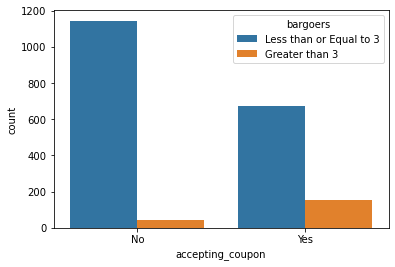

In [324]:
#clearly and somewhat obviously those that frequent bars often should be targeted for bar coupons
sns.countplot(x = 'accepting_coupon', hue = 'bargoers',  data = bar_coupons)

## 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [325]:
#rename age values
def calc_new_col2(row):
    if row['age'] == 'below21' :
        return 'Under 21'
    elif row['age'] == '21' :
        return 'Age 21 to 25'
    elif row['age'] == '26' :
        return 'Age 26 to 30'
    elif row['age'] == '31' :
        return 'Age 31 to 35'
    elif row['age'] == '36' :
        return 'Age 36 to 40'
    elif row['age'] == '41' :
        return 'Age 41 to 45'
    elif row['age'] == '46' :
        return 'Age 46 to 50'
    elif row['age'] == '50plus' :
        return 'Over 50'
        
data['ages'] = data.apply(calc_new_col2, axis = 1)
bar_coupons['ages'] = bar_coupons.apply(calc_new_col2, axis = 1)

/var/folders/kf/0f7t7jlj05d948lftjhjgf640000gn/T/ipykernel_4174/1422943782.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
#find drivers that go to bar more than once and over age of 25
data.age.unique()
data.Bar.unique()
bar_gt1_over25  = bar_coupons.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['ages'] == 'Age 26 to 30') | (data['ages'] == 'Age 31 to 35') | \
                           (data['ages'] == 'Age 36 to 40') | (data['ages'] == 'Age 41 to 45') | \
                           (data['ages'] == 'Age 46 to 50') | (data['ages'] == 'Over 50'))]
bar_gt1_over25.shape[0]

420

In [327]:
# find drivers that go less than once per month and are under the age of 25
bar_lt1_under25 = bar_coupons.loc[((data['Bar'] != '1~3') & (data['Bar'] != '4~8') &(data['Bar'] != 'gt8')) & \
                           ((data['ages'] != 'Age 26 to 30') & (data['ages'] != 'Age 31 to 35') & \
                           (data['ages'] != 'Age 36 to 40') & (data['ages'] != 'Age 41 to 45') & \
                           (data['ages'] != 'Age 46 to 50') & (data['ages'] != 'Over 50'))]
bar_lt1_under25.shape[0]

328

## Comparing the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
We see there is a slight difference as those drivers that go to a bar more than once per month and are over 25 accept the coupon at 62% compared to 56% of overall drivers.

In [328]:
#overall acceptance rate
bar_coupons['accepting_coupon'].value_counts(normalize = True)

No     0.589985
Yes    0.410015
Name: accepting_coupon, dtype: float64

In [329]:
# acceptance rate for those that go less than once per month and are 25 or under
bar_lt1_under25['accepting_coupon'].value_counts(normalize = True)

No     0.606707
Yes    0.393293
Name: accepting_coupon, dtype: float64

In [330]:
# Acceptance rate for those drivers that go to bars more than once and are over 25
bar_gt1_over25['accepting_coupon'].value_counts(normalize = True)

Yes    0.695238
No     0.304762
Name: accepting_coupon, dtype: float64

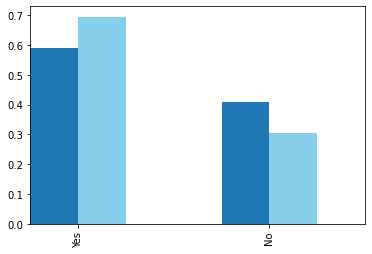

In [331]:
width = .25
bar_coupons['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar', position = 1, width = width)
bar_gt1_over25['accepting_coupon'].value_counts(normalize = True).plot(kind = 'bar', color = 'skyblue', position = 0, width = width)
plt.show()

<AxesSubplot:>

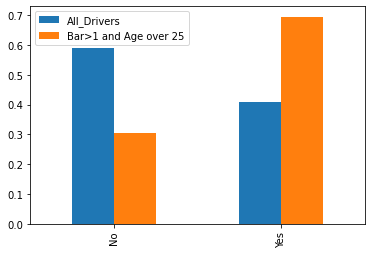

In [332]:
# We see that drivers over the age of 25 and frequent bars more than once are more likely to accept coupon.
graph_df_ratio = bar_coupons['accepting_coupon'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar_gt1_over25['accepting_coupon'].value_counts(normalize = True).rename('Bar>1 and Age over 25').to_frame())

graph_df_ratio.plot(kind = 'bar')

<AxesSubplot:>

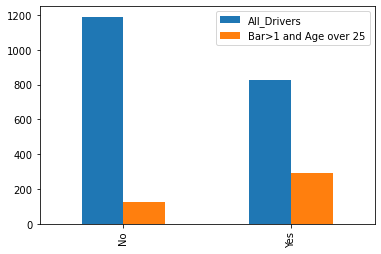

In [333]:
graph_df_count = bar_coupons['accepting_coupon'].value_counts().rename('All_Drivers').to_frame() \
            .join(bar_gt1_over25['accepting_coupon'].value_counts().rename('Bar>1 and Age over 25').to_frame())

graph_df_count
graph_df_count.plot(kind = 'bar')

## 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [334]:
data['passanger'].unique()
data['occupation'].unique()


array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [335]:
# find drivers who go to bars more than once a month and had passengers 
#that were not a kid and had occupations other than farming, fishing, or forestry.
occupations_notff = ['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       ]
bar1_nokid_occupationnotfff = bar_coupons.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['passanger'] == 'Friend(s)') | (data['passanger'] == 'Partner')) & \
                            (data['occupation'] != 'Farming Fishing & Forestry')]

bar1_nokid_occupationnotfff
                            

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,Y,direction,accepting_coupon,bargoers,ages
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3,gt8,4~8,1~3,less1,1,0,0,1,Different,Yes,Less than or Equal to 3,Age 26 to 30
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,gt8,gt8,gt8,gt8,gt8,1,0,0,1,Different,Yes,Greater than 3,Age 26 to 30
224,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,0,0,0,Different,No,Less than or Equal to 3,Age 21 to 25
227,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 26 to 30
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 26 to 30
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$50000 - $62499,1~3,never,4~8,4~8,less1,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 26 to 30
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,0,High School Graduate,Food Preparation & Serving Related,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,1,0,1,Different,Yes,Less than or Equal to 3,Age 21 to 25


In [336]:
# These drivers accept coupons at higher rate
bar1_nokid_occupationnotfff['accepting_coupon'].value_counts(normalize = True)

Yes    0.717949
No     0.282051
Name: accepting_coupon, dtype: float64

<AxesSubplot:>

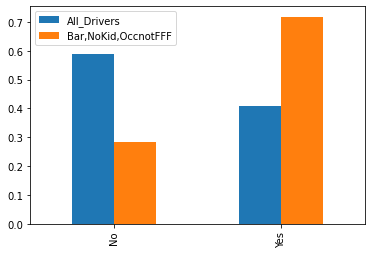

In [337]:
graph_df_ratio2 = bar_coupons['accepting_coupon'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar1_nokid_occupationnotfff['accepting_coupon'].value_counts(normalize = True).rename('Bar,NoKid,OccnotFFF').to_frame())

graph_df_ratio2.plot(kind = 'bar')

## 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [338]:
# Get the 3 filtered drivers
bar1_nokid_notwidow = bar_coupons.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['passanger'] == 'Friend(s)') | (data['passanger'] == 'Partner')) & \
                            (data['maritalStatus'] != 'Widowed')]

bar1_under30 = bar_coupons.loc[((data['Bar'] == '1~3') | (data['Bar'] == '4~8') | (data['Bar'] == 'gt8')) & \
                           ((data['ages'] == 'Age 26 to 30') | (data['ages'] == '21 to 25') | \
                           (data['ages'] == 'Under 21'))]

cheaprest4_incomeunder50 = bar_coupons.loc[((data['RestaurantLessThan20'] == '4~8') | (data['Bar'] == 'gt8')) & \
                                     ((data['income'] == '$37500 - $49999' ) | (data['income'] == '$12500 - $24999') | \
                                      (data['income'] == 'Less than $12500'))]

bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

<AxesSubplot:>

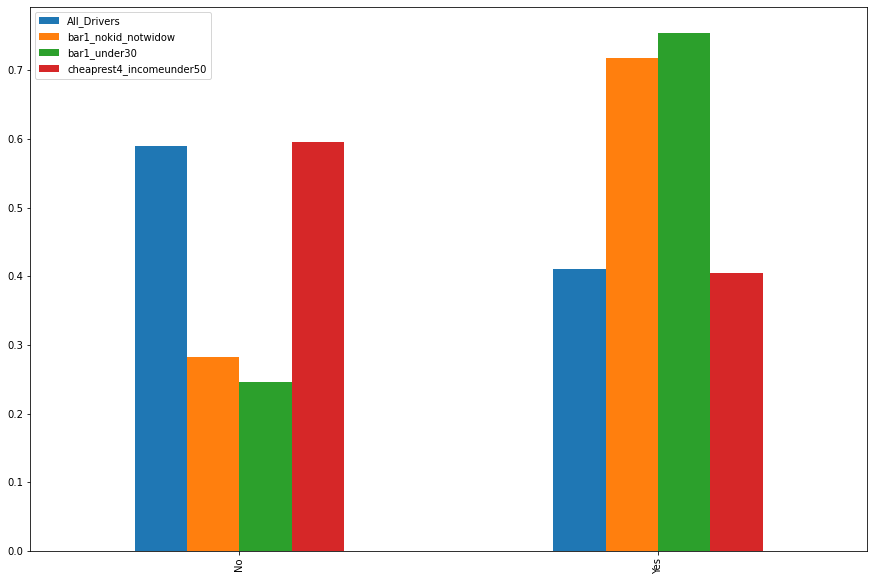

In [387]:
# create and plot one dataframe from info needed
graph_df_ratio3 = bar_coupons['accepting_coupon'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar1_nokid_notwidow['accepting_coupon'].value_counts(normalize = True).rename('bar1_nokid_notwidow').to_frame()) \
            .join(bar1_under30['accepting_coupon'].value_counts(normalize = True).rename('bar1_under30').to_frame()) \
            .join(cheaprest4_incomeunder50['accepting_coupon'].value_counts(normalize = True).rename('cheaprest4_incomeunder50').to_frame())

graph_df_ratio3.plot(kind = 'bar', figsize = (15,10))

## 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations it appears that drivers who frequent bars more than once per month, don't have kids, and are younger than 30  are most likely to accept the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [340]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'Y', 'direction',
       'accepting_coupon', 'bargoers', 'ages'],
      dtype='object')

<AxesSubplot:>

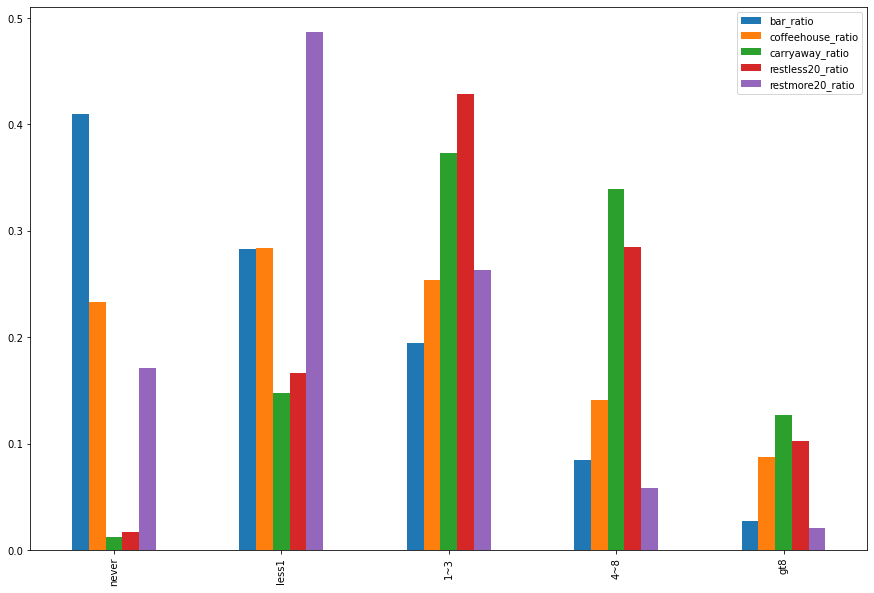

In [386]:
frequency = data[[ 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' ]]
frequency_values = frequency.apply(pd.Series.value_counts)
frequency_values
# frequency_values['Bar'][0] / frequency_values['Bar'].sum()
frequency_order = ['never','less1', '1~3', '4~8', 'gt8']
frequency_values['bar_ratio'] = frequency_values['Bar'] / frequency_values['Bar'].sum()
frequency_values['coffeehouse_ratio'] = frequency_values['CoffeeHouse'] / frequency_values['CoffeeHouse'].sum()
frequency_values['carryaway_ratio'] = frequency_values['CarryAway'] / frequency_values['CarryAway'].sum()
frequency_values['restless20_ratio'] = frequency_values['RestaurantLessThan20'] / frequency_values['RestaurantLessThan20'].sum()
frequency_values['restmore20_ratio'] = frequency_values['Restaurant20To50'] / frequency_values['Restaurant20To50'].sum()
frequency_values
frequency_values_ratios = frequency_values[['bar_ratio', 'coffeehouse_ratio', 'carryaway_ratio','restless20_ratio', 'restmore20_ratio']]
frequency_values_ratios.loc[frequency_order].plot(kind = 'bar', figsize = (15, 10))

In [395]:
frequency_order = ['never','less1', '1~3', '4~8', 'gt8']
frequency_values.loc[frequency_order].plot(kind = 'bar', figsize = (15,10), )

TypeError: can't multiply sequence by non-int of type 'float'

In [341]:
coupon_income_education = data.value_counts(subset = ['accepting_coupon', 'income', 'education'])
#print(type(coupon_income_education))
coupon_income_education = coupon_income_education.to_frame()
print(type(coupon_income_education))

<class 'pandas.core.frame.DataFrame'>


In [353]:
coupon_income_education = coupon_income_education.reset_index()
coupon_income_education

,index,accepting_coupon,income,education,value_count
0,0,Yes,$25000 - $37499,Some college - no degree,503
1,1,Yes,$100000 or More,Bachelors degree,434
2,2,Yes,$37500 - $49999,Some college - no degree,405
3,3,Yes,$25000 - $37499,Bachelors degree,401
4,4,Yes,$12500 - $24999,Some college - no degree,390
...,...,...,...,...,...
87,87,No,Less than $12500,Graduate degree (Masters or Doctorate),16
88,88,Yes,Less than $12500,Some High School,15
89,89,No,$100000 or More,High School Graduate,13
90,90,Yes,$100000 or More,High School Graduate,9


In [343]:
coupon_income_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   accepting_coupon  92 non-null     object
 1   income            92 non-null     object
 2   education         92 non-null     object
 3   0                 92 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 3.0+ KB


In [344]:
coupon_income_education = coupon_income_education.rename(columns = { 0 : "value_count"})

In [345]:
coupon_income_education

,accepting_coupon,income,education,value_count
0,Yes,$25000 - $37499,Some college - no degree,503
1,Yes,$100000 or More,Bachelors degree,434
2,Yes,$37500 - $49999,Some college - no degree,405
3,Yes,$25000 - $37499,Bachelors degree,401
4,Yes,$12500 - $24999,Some college - no degree,390
...,...,...,...,...
87,No,Less than $12500,Graduate degree (Masters or Doctorate),16
88,Yes,Less than $12500,Some High School,15
89,No,$100000 or More,High School Graduate,13
90,Yes,$100000 or More,High School Graduate,9


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

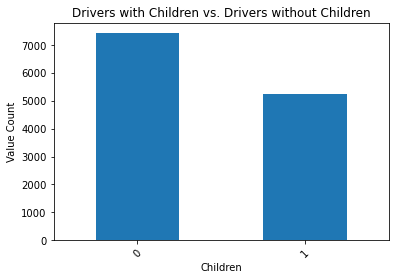

In [346]:
# plotting children vs. no children
data['has_children'].value_counts()
ax = data['has_children'].value_counts().plot(kind = 'bar')
plt.xlabel('Children')
plt.ylabel('Value Count')
plt.title('Drivers with Children vs. Drivers without Children')
plt.xticks(rotation = 45)

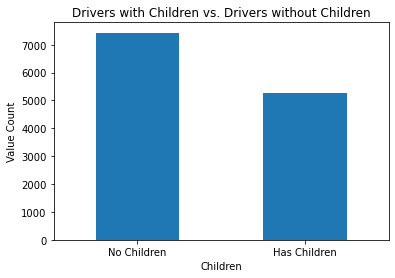

In [347]:
# plotting with proper labels for X axis
x = [0, 1]
labels = ['No Children', 'Has Children']
ax = data['has_children'].value_counts().plot(kind = 'bar')
plt.xlabel('Children')
plt.ylabel('Value Count')
plt.title('Drivers with Children vs. Drivers without Children')
plt.xticks(x, labels, rotation = 'horizontal')
plt.show()

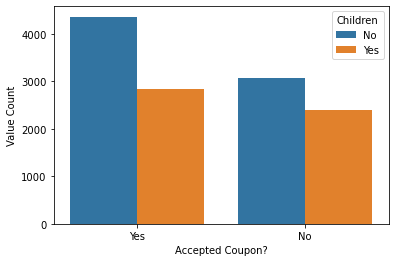

In [348]:
# Comparing those with kids vs. those without kids
x = sns.countplot(x = 'accepting_coupon', hue = 'has_children',  data = data)
ax.set(title = "Accepting Coupons with and without Kids")
plt.xlabel('Accepted Coupon?')
plt.ylabel('Value Count')
plt.xticks(rotation = 'horizontal')
plt.legend(title = "Children", labels = ['No', 'Yes'])